In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import mpl_toolkits.mplot3d 

In [2]:
df=datasets.load_iris()

### Analyse exploratoire

In [3]:
# print(df.data)
# print(df.target)

In [4]:
print(df.target_names)
print(df.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Peprocessing

In [5]:
# mettons le dans le dataframe
x = pd.DataFrame(df.data)
#les noms des colonnes
x.columns=['Sepal_Length','Sepal_Width', 'Petal_Length', 'Petal_Width']

In [6]:
y = pd.DataFrame(df.target)
y.columns=['Classe']

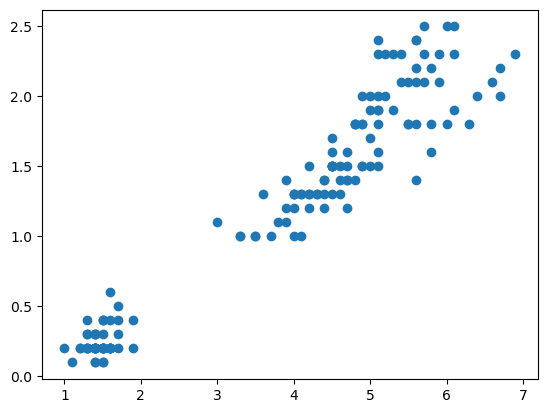

In [7]:
#Repartition du dataset
plt.scatter(x.Petal_Length, x.Petal_Width)

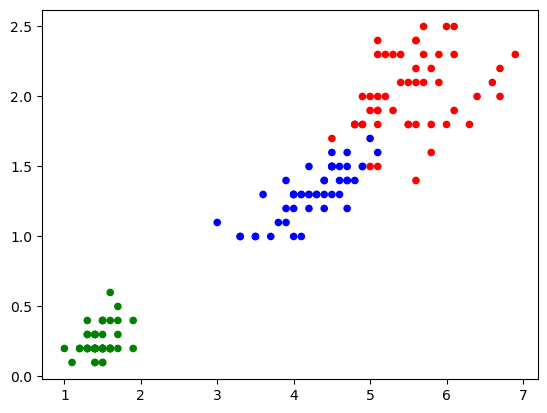

In [8]:
#Visualiser les classes de notre datasets
couleur=np.array(['green','blue', 'red'])

# Visualisation 3D
#fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

plt.scatter(x.Petal_Length, x.Petal_Width, c=couleur[df.target], s=20)

## Utilisation de la méthode ELBOW 
##### Cette méthode nous facilite la tache pour le choix de la valeur de k

In [9]:
# La methode Elbow pour trouver le nombre optimal de clusters
inert = []
for i in range(1, 11):
    kmeans= KMeans(n_clusters =i)
    kmeans.fit(x)
    inert.append(kmeans.inertia_)
    

C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans 

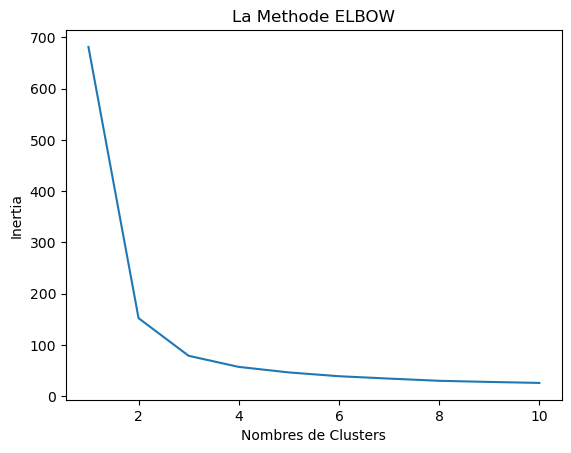

In [10]:
# Affichons La courbe de la methode Elbow
plt.plot(range(1, 11), inert)
plt.title('La Methode ELBOW')
plt.xlabel('Nombres de Clusters')
plt.ylabel('Inertia')
plt.show()

# Model

In [11]:
model= KMeans(n_clusters = 3)
model.fit(x)

C:\Users\Abdoulaye MAIGA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
#model.predict(x)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

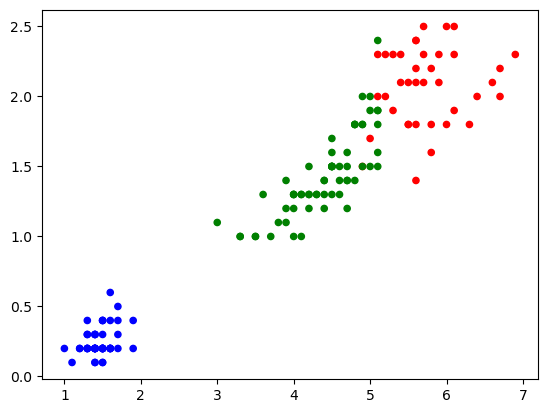

In [13]:
#Visualisations des classes predites
couleur=np.array(['green','blue', 'red'])

#Visualisation 3D
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

plt.scatter(x.Petal_Length, x.Petal_Width, c=couleur[model.labels_], s=20)

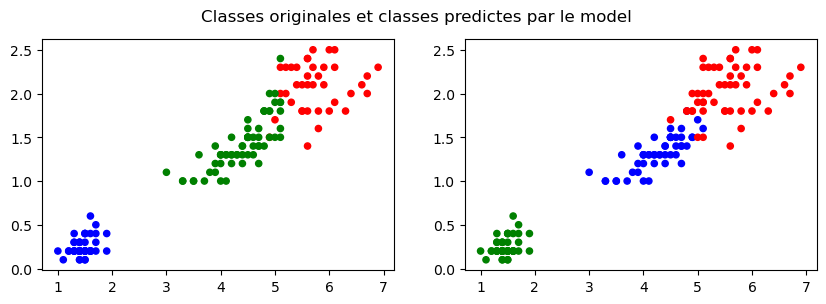

In [14]:
#Maintenant voyons les classes réelles et celles predictes par le model

fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Classes originales et classes predictes par le model')
ax1.scatter(x.Petal_Length, x.Petal_Width, c=couleur[model.labels_], s=20)
ax2.scatter(x.Petal_Length, x.Petal_Width, c=couleur[df.target], s=20)

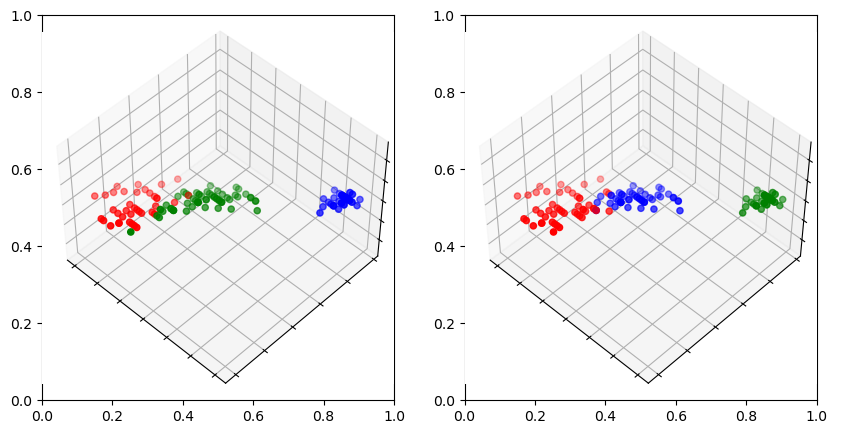

In [15]:
# Visualisation 3D
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1, projection="3d", elev=48, azim=134)
ax2 = fig.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134)

ax1.scatter(x.Petal_Length, x.Petal_Width, c=couleur[model.labels_], s=20)
ax2.scatter(x.Petal_Length, x.Petal_Width, c=couleur[df.target], s=20)

ax1.set(xticklabels=[],yticklabels=[],zticklabels=[])
ax2.set(xticklabels=[],yticklabels=[],zticklabels=[])
plt.show()

# Metrics

In [16]:
# Matrice de Confusion
confusion_matrix(df.target, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

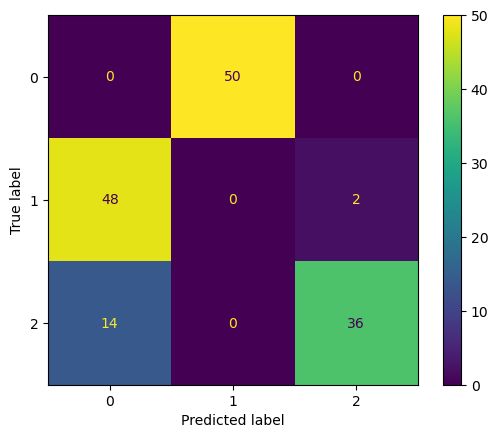

In [17]:
ConfusionMatrixDisplay.from_predictions(df.target, model.labels_)
plt.show()